#Data loading and Preparation

##Data Loading

In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Loading data
path = '/content/4A_TB_cleaned_replicated.xlsx'
data =pd.read_excel(path)
data.head(2)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,...,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,Tuesday,2010,6,0,0,0,0,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,Tuesday,2010,6,0,0,0,0,CENTRAL,"ISS,,",1


#Model training

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
tf.random.set_seed(42)

In [13]:
#extracting features and targets
targets = ['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']
X = data_enc.drop(columns=targets).values
y = data_enc[['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']].values


#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Define the L2 regularization strength
l2_lambda = 0.00001

# neural network model for logistic regression
def logistic_regression_model(input_dim, learning_rate):
    inputs = keras.Input(shape=(input_dim,))
    outputs = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_lambda))(inputs)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

accuracy_scores = []  # list to store accuracy for each week
auc_scores = []  # list to store AUC for each week
training_losses = []
validation_losses = []

# Initializing models for each week using a loop
num_weeks = 4
models = [logistic_regression_model(input_dim=X.shape[1], learning_rate=0.001) for _ in range(num_weeks)]

num_epochs = 30
batch_size = 32

for week in range(num_weeks):
    model = models[week]
    history = model.fit(X_train, y_train[:, week], epochs=num_epochs,
                        batch_size=batch_size, validation_data=(X_test, y_test[:, week]))

    # Extracting training and validation loss
    training_losses.append(history.history['loss'])
    validation_losses.append(history.history['val_loss'])

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test[:, week], y_pred_binary)
    auc = roc_auc_score(y_test[:, week], y_pred)  # Calculate AUC


    print(f'Accuracy for Week {week}: {accuracy}')
    print(f'AUC for Week {week}: {auc}')

    # Store the accuracy and AUC in their respective lists
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)


In [ ]:
# printing accuracy
for week, accuracy in enumerate(accuracy_scores):
  print(f"Week {week + 1} Accuracy: {accuracy}")


Week 1 Accuracy: 0.8412308746289107
Week 2 Accuracy: 0.7944736241150948
Week 3 Accuracy: 0.7917332724366294
Week 4 Accuracy: 0.7888216487782599


In [ ]:
# Separate loop to print AUC scores
for week, auc in enumerate(auc_scores):
    print(f'AUC for Week {week}: {auc}')

AUC for Week 0: 0.8946836962917414
AUC for Week 1: 0.8882141494567919
AUC for Week 2: 0.8896125745761543
AUC for Week 3: 0.8895011378879787


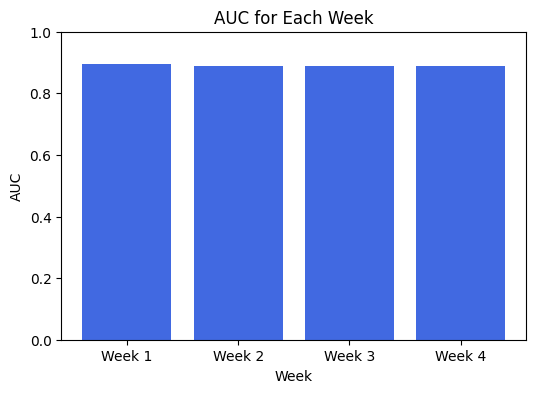

In [ ]:
# Create a bar plot to visualize AUC for each week
plt.figure(figsize=(6, 4))
plt.bar(range(num_weeks), auc_scores, color='royalblue')
plt.xlabel('Week')
plt.ylabel('AUC')
plt.title('AUC for Each Week')
plt.xticks(range(num_weeks), [f'Week {week + 1}' for week in range(num_weeks)])
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.show()

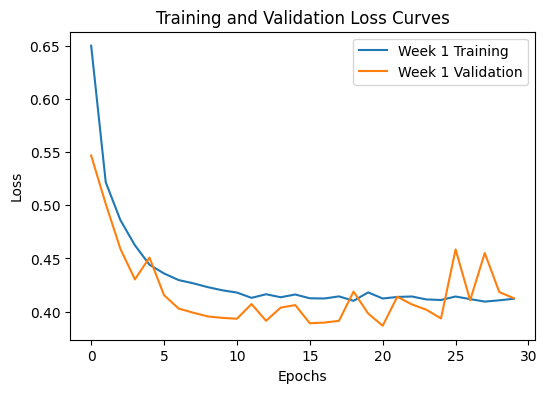

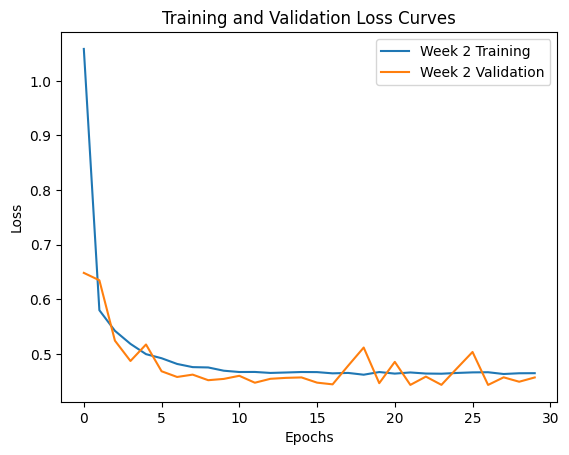

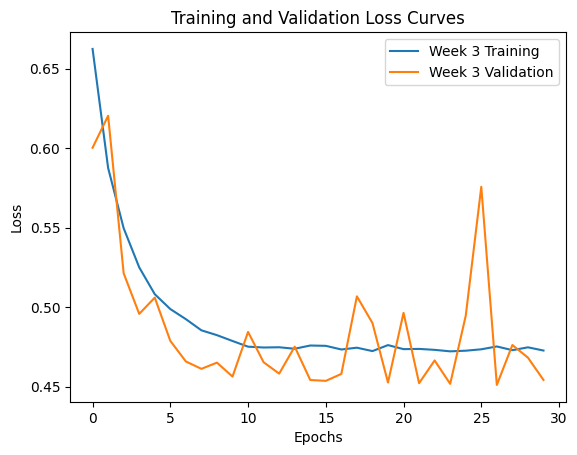

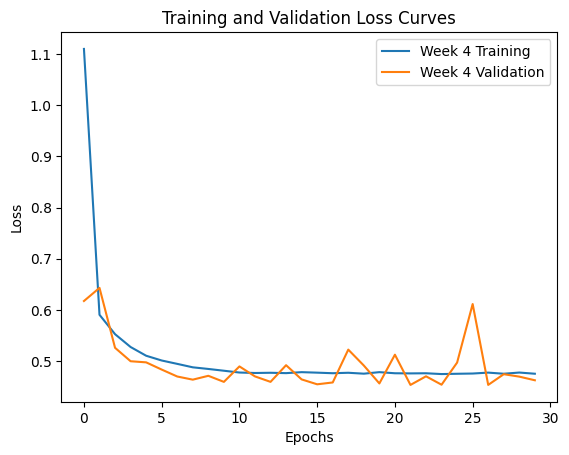

In [ ]:
# Plot training and validation loss curves
plt.figure(figsize=(6, 4))
for week in range(num_weeks):
    plt.plot(training_losses[week], label=f'Week {week + 1} Training')
    plt.plot(validation_losses[week], label=f'Week {week + 1} Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()